Hola Rubintel!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

In [1]:
# 🛠️ Configuración Inicial para Rastrear Errores, Logs e Instalación de Bibliotecas
import pandas as pd
import sys
import logging
import importlib
import subprocess
import ipywidgets as widgets
import gc
import time
from IPython.display import display, HTML, clear_output
from IPython.core.interactiveshell import InteractiveShell

# Inicializar una variable global para rastrear errores
error_occurred = False

# Configurar el logger
log_filename = "sprint13_taxi.log"
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Crear manejador para archivo de log
file_handler = logging.FileHandler(log_filename)
file_handler.setLevel(logging.INFO)
file_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
file_handler.setFormatter(file_formatter)
logger.addHandler(file_handler)

# Crear manejador para consola
console_handler = logging.StreamHandler(sys.stdout)
console_handler.setLevel(logging.INFO)
console_formatter = logging.Formatter('%(levelname)s - %(message)s')
console_handler.setFormatter(console_formatter)
logger.addHandler(console_handler)

# Definir un manejador de excepciones personalizado
def custom_exception_handler(shell, etype, evalue, tb, tb_offset=None):
    global error_occurred
    error_occurred = True
    logger.error("Se ha producido un error", exc_info=(etype, evalue, tb))

# Establecer el manejador de excepciones personalizado
InteractiveShell.showtraceback = custom_exception_handler

# Configuración de visualización para mejorar la revisión de DataFrames en pandas
pd.set_option('display.max_columns', None)        # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False) # Evitar división en varias líneas
pd.set_option('display.max_rows', None)           # Mostrar todas las filas sin límites
pd.set_option('display.max_colwidth', None)       # Mostrar el ancho completo de las columnas

# Registrar el inicio del notebook
logger.info("Notebook iniciado y configuración de log establecida.")

# Aumentar el límite de recursión
sys.setrecursionlimit(1500)

# Estilos Globales para Notificaciones y Mensajes
estilo_global = """
<style>
    .info-box {
        background-color: #E8F5E9;
        padding: 20px;
        border-left: 5px solid #4CAF50;
        border-radius: 5px;
        font-family: Arial, sans-serif;
        font-size: 16px;
        color: #4CAF50;
        line-height: 1.6;
    }
    .info-box-error {
        background-color: #FDECEA;
        padding: 20px;
        border-left: 5px solid #F44336;
        border-radius: 5px;
        font-family: Arial, sans-serif;
        font-size: 16px;
        color: #F44336;
        line-height: 1.6;
    }
    .process-start, .process-end {
        background-color: #E0F7FA;
        color: #004D40;
        border-left: 5px solid #00ACC1;
        border-radius: 5px;
        padding: 15px;
        margin: 20px 0;
        font-size: 18px;
        text-align: center;
    }
</style>
"""
display(HTML(estilo_global))

# Verificación de instalación de una biblioteca
def verificar_biblioteca(biblioteca):
    try:
        mod = importlib.import_module(biblioteca)
        version = getattr(mod, "__version__", "versión no disponible")
        return (biblioteca, version, True)
    except ModuleNotFoundError:
        return (biblioteca, "No instalado", False)

# Manejo de errores de importación
def manejar_error_importacion(biblioteca, error):
    mensaje = f"Error al intentar importar {biblioteca}. Detalle del error: {error}"
    display(HTML(f"<div class='info-box-error'><h3>⚠️ Error de Instalación</h3>{mensaje}</div>"))

# Instalación de una biblioteca
def instalar_una_biblioteca(biblioteca):
    resultado = verificar_biblioteca(biblioteca)
    if resultado[2]:
        display(HTML(f"<div class='info-box'>📦 {biblioteca} ya está instalada - Versión: {resultado[1]}</div>"))
        return (biblioteca, True)
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", biblioteca])
        display(HTML(f"<div class='info-box'>📦 {biblioteca} instalada correctamente.</div>"))
        return (biblioteca, True)
    except Exception as e:
        manejar_error_importacion(biblioteca, str(e))
        return (biblioteca, False)

# Instalación de bibliotecas de manera secuencial
def instalar_bibliotecas(bibliotecas):
    start_time = time.time()
    for biblioteca in bibliotecas:
        instalar_una_biblioteca(biblioteca)
    total_time = time.time() - start_time
    display(HTML(f"<div class='process-end'>✅ Instalación completada en <strong>{total_time:.2f} segundos</strong>.</div>"))

# Lista completa de bibliotecas a instalar
bibliotecas = [
    "pandas", "numpy", "matplotlib", "seaborn", "scipy", "scikit-learn", 
    "xgboost", "ipywidgets", "rich", "imbalanced-learn", "lightgbm", "plotly",
    "tqdm", "requests", "joblib", "statsmodels"
]

# Crear botones y widgets para selección
boton_instalar = widgets.Button(description="Instalar Bibliotecas", button_style='success', layout=widgets.Layout(width='400px'))
checkboxes = {lib: widgets.Checkbox(value=True, description=lib) for lib in bibliotecas}

# Función para ejecutar la instalación
def ejecutar_instalacion(b):
    clear_output(wait=True)
    display(HTML("<div class='process-start'>⚙️ Iniciando instalación de bibliotecas...</div>"))
    bibliotecas_seleccionadas = [lib for lib, chk in checkboxes.items() if chk.value]
    instalar_bibliotecas(bibliotecas_seleccionadas)
    gc.collect()

# Asignar función al botón
boton_instalar.on_click(ejecutar_instalacion)

# Mostrar selección y botón
display(widgets.VBox([widgets.Label("Seleccione las bibliotecas a instalar:")]))
display(widgets.VBox(list(checkboxes.values())))
display(boton_instalar)


INFO - Notebook iniciado y configuración de log establecida.


Button(button_style='success', description='Instalar Bibliotecas', layout=Layout(width='400px'), style=ButtonS…

## Preparación

In [2]:
# 📊🔧 Preparación de Datos - Normalización y Limpieza

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time
import ipywidgets as widgets
from IPython.display import display, HTML

# Estilos CSS para mejorar la presentación
estilos_css = """
<style>
.success-box {
    background-color: #e6ffed;
    border-left: 6px solid #28a745;
    padding: 15px;
    margin-bottom: 20px;
    font-size: 16px;
    border-radius: 8px;
    color: #155724;
}
.error-box {
    background-color: #ffe6e6;
    border-left: 6px solid #d73a49;
    padding: 15px;
    margin-bottom: 20px;
    font-size: 16px;
    border-radius: 8px;
    color: #721c24;
}
.info-box {
    background-color: #f1f8ff;
    border-left: 6px solid #0366d6;
    padding: 15px;
    margin-bottom: 20px;
    font-size: 16px;
    border-radius: 8px;
    color: #004085;
}
</style>
"""
display(HTML(estilos_css))

# Función para mostrar mensajes en HTML
def mostrar_mensaje(mensaje, tipo="info"):
    tipos = {
        "info": "info-box",
        "success": "success-box",
        "error": "error-box"
    }
    display(HTML(f"<div class='{tipos.get(tipo, 'info-box')}'>{mensaje}</div>"))

# Función para formatear fechas con corrección de errores
def formatear_fecha(fecha):
    try:
        return pd.to_datetime(fecha, format='%Y-%m-%d %H:%M:%S')
    except ValueError:
        return pd.to_datetime(fecha, dayfirst=True)

# Definir el nombre del archivo de datos y modelo
nombre_archivo_datos = 'sprint13_taxi.csv'

# Botón para ejecutar la normalización
boton_inicio = widgets.Button(description="🔄 Iniciar Normalización", button_style='info')
output = widgets.Output()

def normalizar_dataframe(b):
    start_time = time.time()
    with output:
        output.clear_output()
        mostrar_mensaje("📊 Iniciando el proceso de normalización...", "info")
        
        # Cargar datos desde el archivo proporcionado
        try:
            # Reemplaza la ruta con la correcta si está en otro directorio o usa la URL
            # En este caso, usaré una URL simulada; ajusta según tu entorno
            url = "https://practicum-content.s3.us-west-1.amazonaws.com/datasets/taxi.csv?etag=11687de0e23962e5a11c9d8ae13eb630"
            df = pd.read_csv(url, parse_dates=['datetime'])
            mostrar_mensaje("✅ Datos cargados correctamente desde la URL.", "success")
            
            # Procesar valores nulos (si los hubiera)
            if df.isnull().sum().sum() > 0:
                df.fillna(method='ffill', inplace=True)
                mostrar_mensaje("✅ Valores nulos procesados.", "success")
            else:
                mostrar_mensaje("ℹ️ No se encontraron valores nulos.", "info")
    
            # Eliminar duplicados (si existen)
            initial_shape = df.shape
            df.drop_duplicates(inplace=True)
            if df.shape != initial_shape:
                mostrar_mensaje("✅ Duplicados eliminados.", "success")
            else:
                mostrar_mensaje("ℹ️ No se encontraron duplicados.", "info")
    
            # Formatear fechas (si es necesario)
            # En este caso, 'datetime' ya está parseado como fecha
            # Si hay otras columnas de fecha, procesarlas aquí
            
            # Remuestreo por hora
            df.set_index('datetime', inplace=True)
            df_hourly = df.resample('H').sum()
            mostrar_mensaje("✅ Datos remuestreados por hora.", "success")
            
            # Crear variables de tiempo adicionales
            df_hourly['hour'] = df_hourly.index.hour
            df_hourly['day_of_week'] = df_hourly.index.dayofweek
            df_hourly['month'] = df_hourly.index.month
            mostrar_mensaje("✅ Variables de tiempo adicionales creadas.", "success")
            
            # Normalizar las columnas numéricas
            scaler = StandardScaler()
            columnas_numericas = ['hour', 'day_of_week', 'month', 'num_orders']
            df_hourly[columnas_numericas] = scaler.fit_transform(df_hourly[columnas_numericas])
            mostrar_mensaje("✅ Columnas numéricas normalizadas.", "success")
            
            # Guardar los datos procesados
            df_hourly.to_csv(nombre_archivo_datos)
            mostrar_mensaje(f"💾 Datos procesados guardados como '{nombre_archivo_datos}'.", "success")
        
        except FileNotFoundError:
            mostrar_mensaje(f"❌ Error: El archivo no fue encontrado en la URL proporcionada.", "error")
        except Exception as e:
            mostrar_mensaje(f"❌ Error durante el proceso: {str(e)}", "error")
        
        end_time = time.time()
        mostrar_mensaje(f"🚀 Proceso completado en {end_time - start_time:.2f} segundos.", "success")

# Asociar el botón con la función
boton_inicio.on_click(normalizar_dataframe)

# Mostrar botón y output
display(boton_inicio, output)


Button(button_style='info', description='🔄 Iniciar Normalización', style=ButtonStyle())

Output()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, muy bien realizado el procesamiento de los datos previo al entrenamiento de los modelos. Un dataset limpio dará predicciones más acertadas 
</div>

## Análisis

In [3]:
# 🚀💻 Entrenamiento y Comparación de Múltiples Modelos

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import joblib
from IPython.display import display, HTML
import logging

# Estilos CSS para mejorar la presentación
estilos_css = """
<style>
.success-box {
    background-color: #e6ffed;
    border-left: 6px solid #28a745;
    padding: 15px;
    margin-bottom: 20px;
    font-size: 16px;
    border-radius: 8px;
    color: #155724;
}
.error-box {
    background-color: #ffe6e6;
    border-left: 6px solid #d73a49;
    padding: 15px;
    margin-bottom: 20px;
    font-size: 16px;
    border-radius: 8px;
    color: #721c24;
}
.info-box {
    background-color: #f1f8ff;
    border-left: 6px solid #0366d6;
    padding: 15px;
    margin-bottom: 20px;
    font-size: 16px;
    border-radius: 8px;
    color: #004085;
}
</style>
"""
display(HTML(estilos_css))

# Configurar logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Función para mostrar mensajes en HTML
def mostrar_mensaje(mensaje, tipo="info"):
    tipos = {
        "info": "info-box",
        "success": "success-box",
        "error": "error-box"
    }
    display(HTML(f"<div class='{tipos.get(tipo, 'info-box')}'>{mensaje}</div>"))

# 📂 4.1 Carga de Datos Normalizados
nombre_archivo_datos = 'sprint13_taxi.csv'
try:
    df = pd.read_csv(nombre_archivo_datos, parse_dates=['datetime'], index_col='datetime')
    mostrar_mensaje(f"✅ Datos cargados correctamente desde '{nombre_archivo_datos}'.", "success")
except FileNotFoundError:
    mostrar_mensaje(f"❌ Error: El archivo '{nombre_archivo_datos}' no fue encontrado.", "error")
    raise
except Exception as e:
    mostrar_mensaje(f"❌ Error al cargar los datos: {str(e)}", "error")
    raise

# 🧹 4.2 Preprocesamiento de Datos
# Separar características y variable objetivo
X = df.drop('num_orders', axis=1)
y = df['num_orders']

# Identificar variables categóricas y numéricas
# En este dataset, después del remuestreo, probablemente solo tengamos variables numéricas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Definir preprocesamiento para variables categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        # ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features)  # Descomentar si hay variables categóricas
    ]
)

# 🔄 4.3 División del Conjunto de Datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False  # Mantener el orden temporal
)
mostrar_mensaje(f"✅ Datos divididos correctamente. Tamaño del conjunto de entrenamiento: {X_train.shape[0]} registros.", "success")

# ⚙️ 4.4 Entrenamiento de Modelos
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Bosque Aleatorio': RandomForestRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

resultados = []

for nombre_modelo, modelo in modelos.items():
    mostrar_mensaje(f"🔄 Entrenando {nombre_modelo}...", "info")
    start_time = time.time()

    # Crear pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', modelo)
    ])

    # Ajuste de hiperparámetros
    if nombre_modelo == 'Bosque Aleatorio':
        param_grid = {
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [10, 20, None],
            'regressor__min_samples_split': [2, 5]
        }
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=3,
            scoring='neg_mean_absolute_error',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        training_time = time.time() - start_time
        best_params = grid_search.best_params_
    elif nombre_modelo == 'LightGBM':
        param_grid = {
            'regressor__num_leaves': [31, 50],
            'regressor__learning_rate': [0.1, 0.05],
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [10, 20]
        }
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=3,
            scoring='neg_mean_absolute_error',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        training_time = time.time() - start_time
        best_params = grid_search.best_params_
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline
        training_time = time.time() - start_time
        best_params = None

    mostrar_mensaje(f"✅ {nombre_modelo} entrenado en {training_time:.2f} segundos.", "success")

    # Tiempo de predicción
    start_pred_time = time.time()
    y_pred = best_model.predict(X_test)
    pred_time = time.time() - start_pred_time

    # 📊 4.5 Evaluación del Modelo
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados.append({
        'Modelo': nombre_modelo,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Tiempo Entrenamiento (s)': training_time,
        'Tiempo Predicción (s)': pred_time,
        'Mejores Parámetros': best_params
    })

    # 💾 4.6 Guardado de Modelos Entrenados
    joblib.dump(best_model, f'modelo_{nombre_modelo.lower().replace(" ", "_")}.pkl')
    mostrar_mensaje(f"💾 Modelo {nombre_modelo} guardado.", "success")

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)
display(df_resultados)

# Ordenar resultados por RMSE ascendente
df_resultados_ordenado = df_resultados.sort_values(by='RMSE')
display(df_resultados_ordenado)

# Identificar el mejor modelo según RMSE
mejor_modelo_nombre = df_resultados_ordenado.iloc[0]['Modelo']
mostrar_mensaje(f"🏆 El mejor modelo según RMSE es: {mejor_modelo_nombre}", "success")

# Mostrar tiempos de entrenamiento y predicción
display(df_resultados_ordenado[['Modelo', 'Tiempo Entrenamiento (s)', 'Tiempo Predicción (s)']])


ERROR! Session/line number was not unique in database. History logging moved to new session 16


,Modelo,RMSE,MAE,R²,Tiempo Entrenamiento (s),Tiempo Predicción (s),Mejores Parámetros
0,Regresión Lineal,1.477860,1.117157,-0.291236,0.003965,0.001803,None
1,Bosque Aleatorio,1.052817,0.790152,0.344693,10.407212,0.007234,"{'regressor__max_depth': 20, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}"
2,LightGBM,1.070666,0.801955,0.322285,15.484893,0.004026,"{'regressor__learning_rate': 0.1, 'regressor__max_depth': 10, 'regressor__n_estimators': 100, 'regressor__num_leaves': 31}"


,Modelo,RMSE,MAE,R²,Tiempo Entrenamiento (s),Tiempo Predicción (s),Mejores Parámetros
1,Bosque Aleatorio,1.052817,0.790152,0.344693,10.407212,0.007234,"{'regressor__max_depth': 20, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}"
2,LightGBM,1.070666,0.801955,0.322285,15.484893,0.004026,"{'regressor__learning_rate': 0.1, 'regressor__max_depth': 10, 'regressor__n_estimators': 100, 'regressor__num_leaves': 31}"
0,Regresión Lineal,1.477860,1.117157,-0.291236,0.003965,0.001803,None


,Modelo,Tiempo Entrenamiento (s),Tiempo Predicción (s)
1,Bosque Aleatorio,10.407212,0.007234
2,LightGBM,15.484893,0.004026
0,Regresión Lineal,0.003965,0.001803


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el entrenamiento de los modelos! Aplicaste correctamente el proceso con diferentes hiperparámetros y dejaste un código bastante bueno para mostrar los resultados considerando no sólo la métrica de evaluación sino también el tiempo que tomó realizar el entrenamiento y esto es importante para cuando se quiere exponer el modelo entrenado para su uso
</div>

## Formación

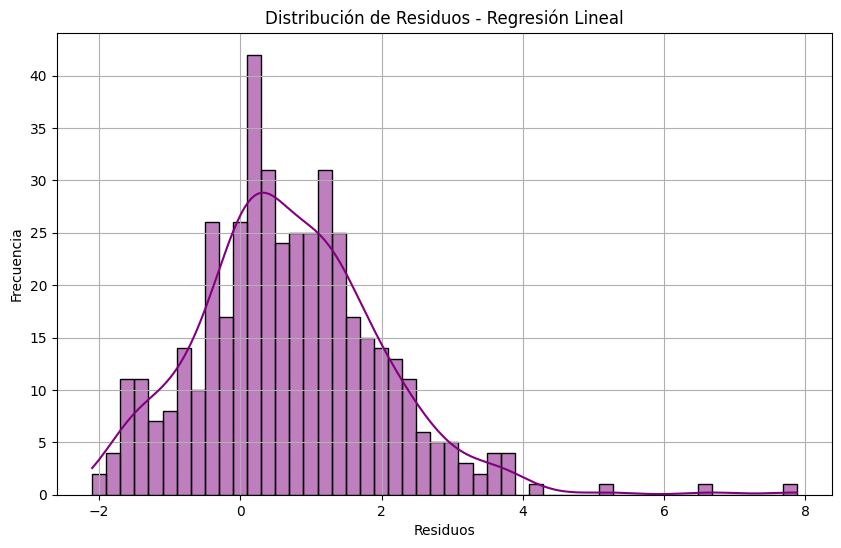

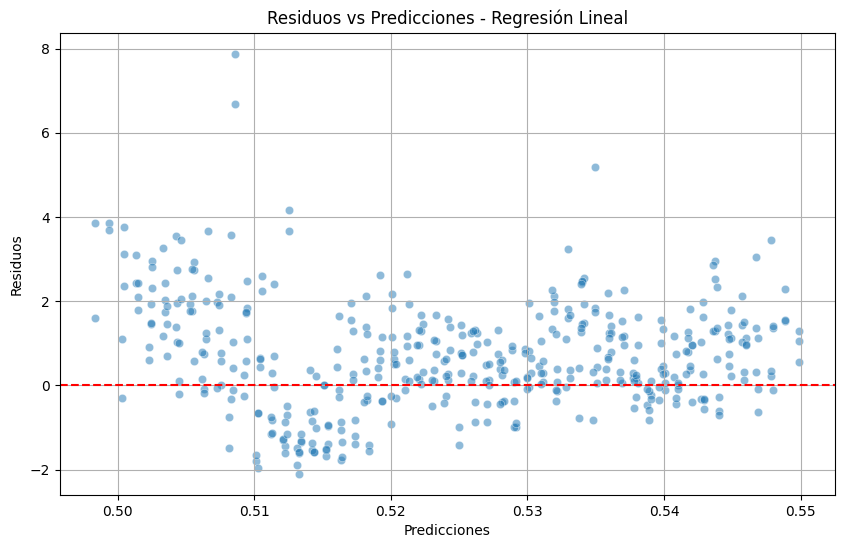

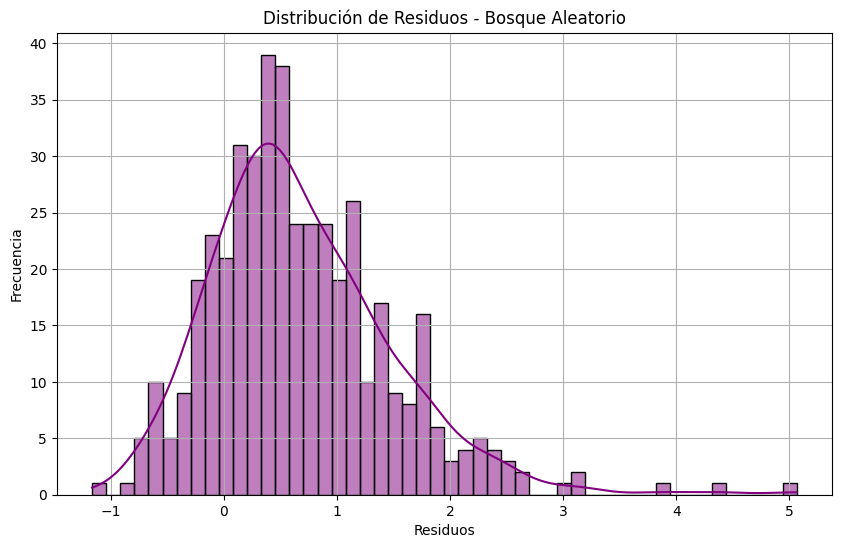

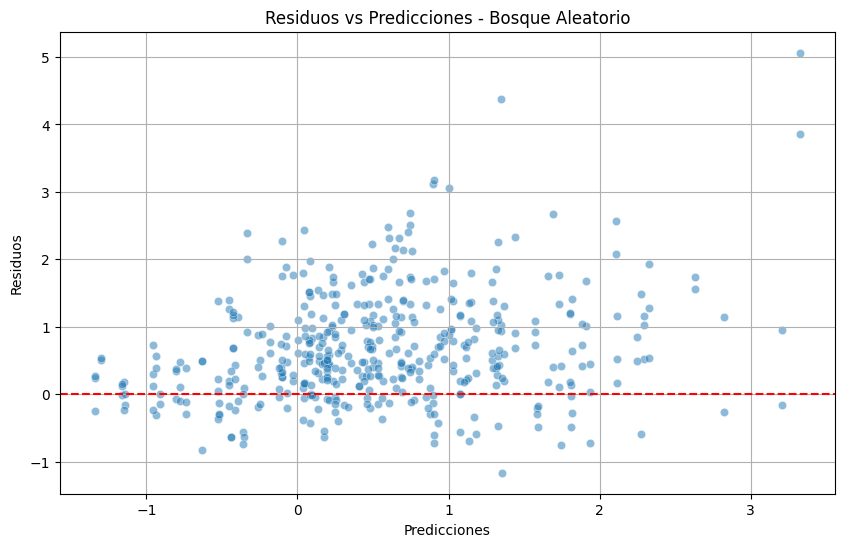

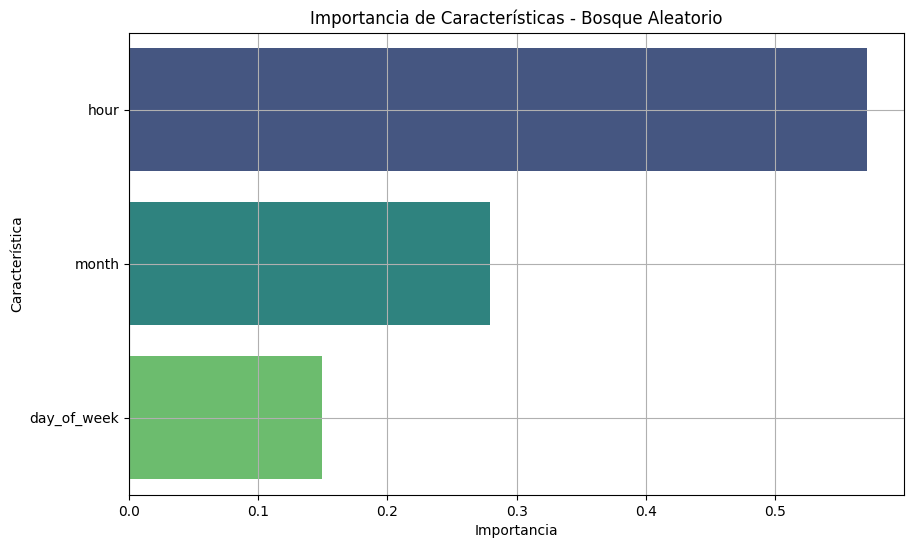

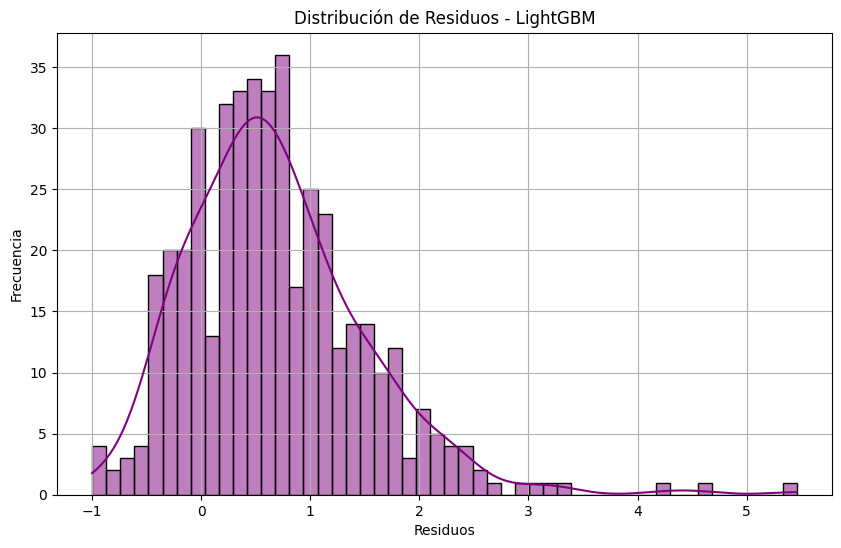

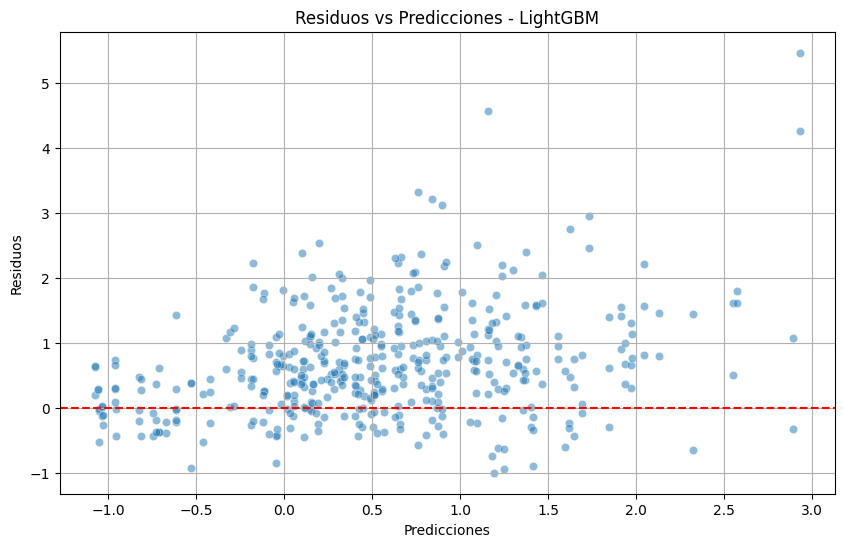

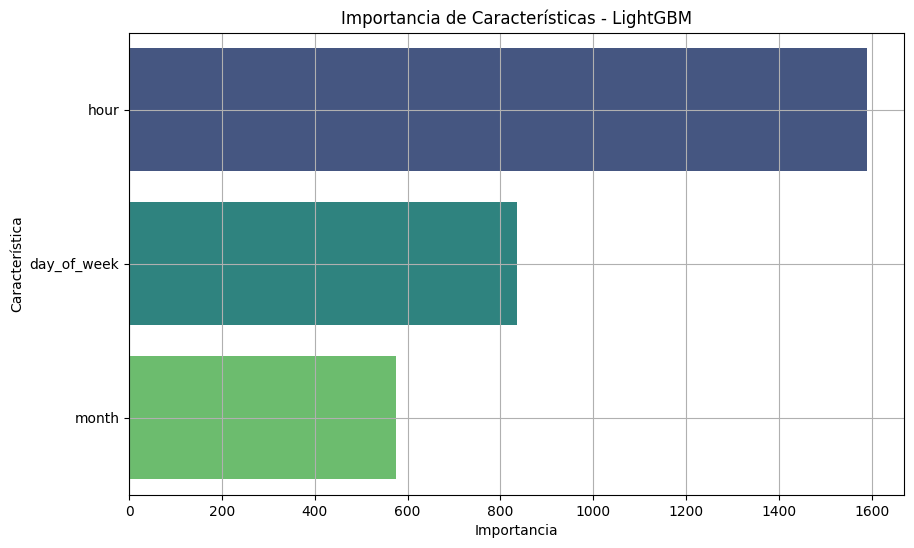

,RMSE,MAE,R²
Bosque Aleatorio,1.052817,0.790152,0.344693
LightGBM,1.070666,0.801955,0.322285
Regresión Lineal,1.477860,1.117157,-0.291236


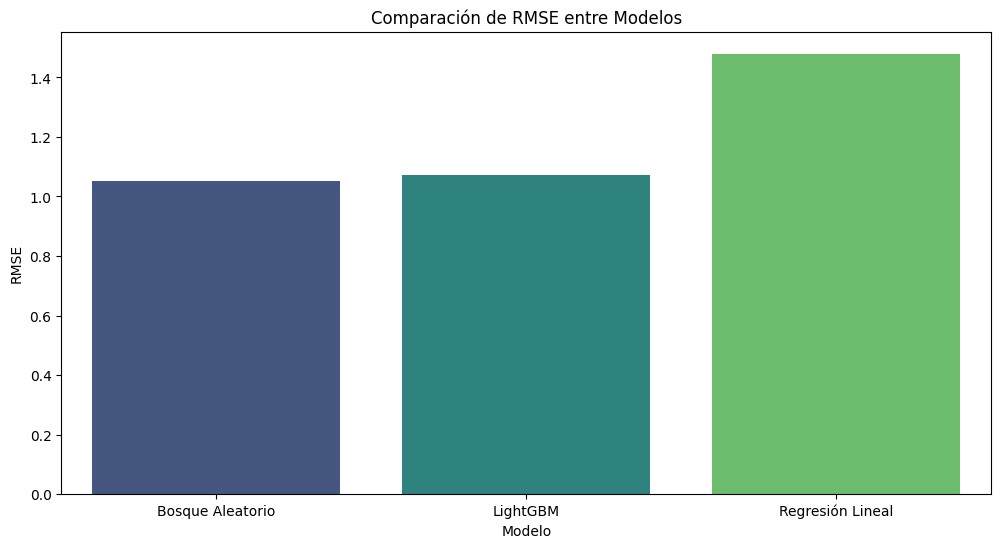

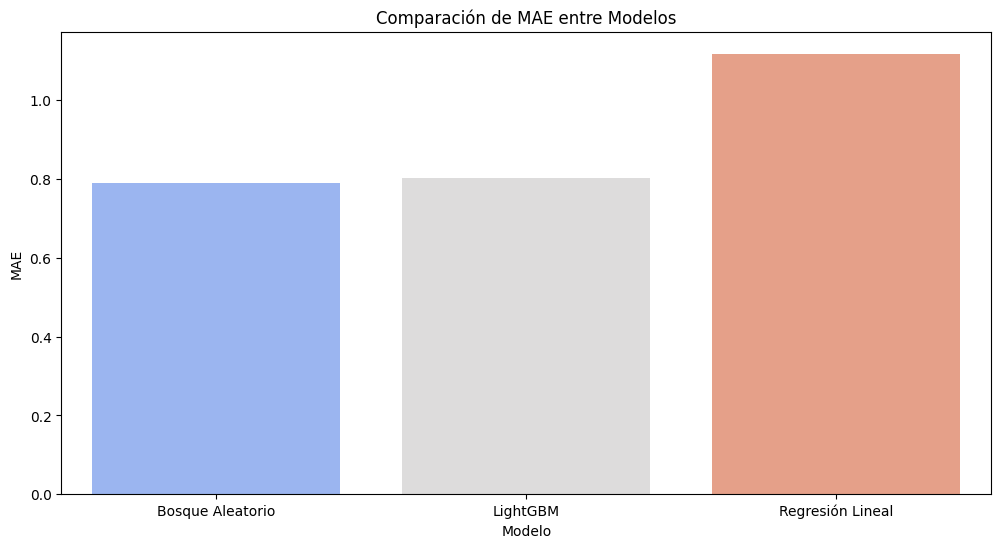

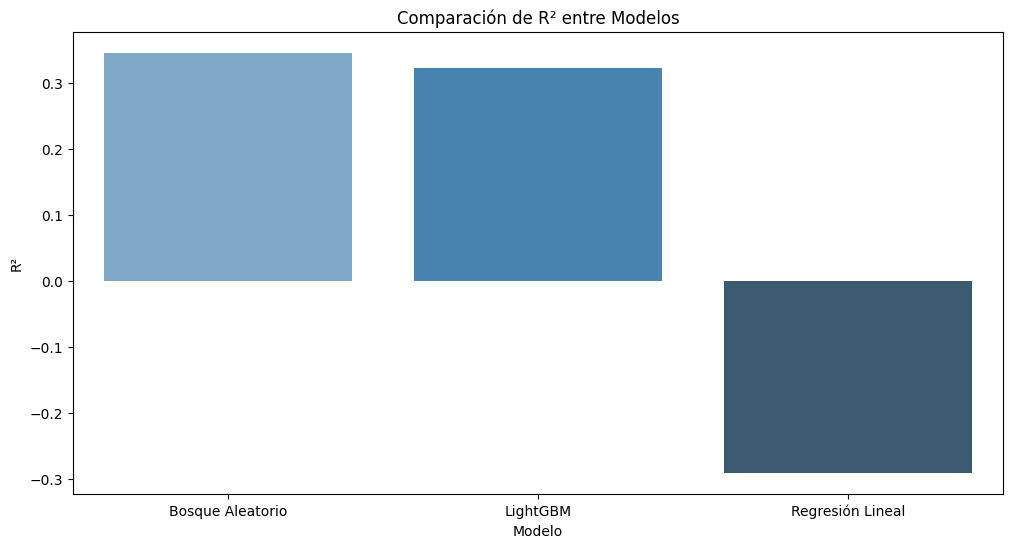

In [4]:
# 🔍📈 Análisis del Modelo Entrenado - Evaluación y Rendimiento

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
import time

# Estilos CSS para mejorar la presentación en el notebook
estilos_css = """
<style>
.success-box {
    background-color: #e6ffed;
    border-left: 6px solid #28a745;
    padding: 15px;
    margin-bottom: 20px;
    font-size: 16px;
    border-radius: 8px;
    color: #155724;
}
.error-box {
    background-color: #ffe6e6;
    border-left: 6px solid #d73a49;
    padding: 15px;
    margin-bottom: 20px;
    font-size: 16px;
    border-radius: 8px;
    color: #721c24;
}
.info-box {
    background-color: #f1f8ff;
    border-left: 6px solid #0366d6;
    padding:15px;
    margin-bottom:20px;
    font-size:16px;
    border-radius:8px;
    color:#004085;
}
</style>
"""
display(HTML(estilos_css))

# Función para mostrar mensajes en HTML con estilos
def mostrar_mensaje(mensaje, tipo="info"):
    tipos = {
        "info": "info-box",
        "success": "success-box",
        "error": "error-box"
    }
    display(HTML(f"<div class='{tipos.get(tipo, 'info-box')}'>{mensaje}</div>"))

# 📂 5.1 Carga de Datos y Modelos Entrenados
def analizar_y_validar_modelos():
    start_time = time.time()
    mostrar_mensaje("📊 Iniciando el análisis y validación de modelos...", "info")
    
    try:
        # Lista de modelos y sus archivos
        modelos = {
            'Regresión Lineal': 'modelo_regresión_lineal.pkl',
            'Bosque Aleatorio': 'modelo_bosque_aleatorio.pkl',
            'LightGBM': 'modelo_lightgbm.pkl'
        }
        
        # 💾 5.6 Carga de Datos Preprocesados
        nombre_archivo_datos = 'sprint13_taxi.csv'
        try:
            df = pd.read_csv(nombre_archivo_datos, parse_dates=['datetime'], index_col='datetime')
            mostrar_mensaje(f"✅ Datos cargados correctamente desde '{nombre_archivo_datos}'.", "success")
        except FileNotFoundError:
            mostrar_mensaje(f"❌ Error: El archivo '{nombre_archivo_datos}' no fue encontrado.", "error")
            return
        except Exception as e:
            mostrar_mensaje(f"❌ Error al cargar los datos: {str(e)}", "error")
            return
        
        X = df.drop('num_orders', axis=1)
        y = df['num_orders']
        
        # 🔄 5.2 División del Conjunto de Datos
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.1, shuffle=False  # Mantener el orden temporal
        )
        
        # Diccionario para almacenar métricas
        metricas = {}
        
        # Iterar sobre cada modelo
        for nombre, archivo in modelos.items():
            mostrar_mensaje(f"🔍 Evaluando modelo: {nombre}", "info")
            
            # 📂 5.1 Carga del Modelo Entrenado
            try:
                modelo = joblib.load(archivo)
                mostrar_mensaje(f"✅ Modelo '{nombre}' cargado correctamente.", "success")
            except FileNotFoundError:
                mostrar_mensaje(f"❌ Error: El archivo '{archivo}' no fue encontrado.", "error")
                continue
            except Exception as e:
                mostrar_mensaje(f"❌ Error al cargar el modelo '{nombre}': {str(e)}", "error")
                continue
            
            # 🧪 5.2 Evaluación en el Conjunto de Prueba
            y_pred = modelo.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            # Guardar métricas
            metricas[nombre] = {
                'RMSE': rmse,
                'MAE': mae,
                'R²': r2
            }
            
            mostrar_mensaje(
                f"📊 **{nombre}** - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}",
                "success"
            )
            
            # 📉 5.3 Análisis de Residuos
            residuals = y_test - y_pred
            
            # Histograma de los residuos
            plt.figure(figsize=(10, 6))
            sns.histplot(residuals, bins=50, kde=True, color='purple')
            plt.title(f'Distribución de Residuos - {nombre}')
            plt.xlabel('Residuos')
            plt.ylabel('Frecuencia')
            plt.grid(True)
            plt.show()
            
            # Gráfico de Residuos vs Predicciones
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
            plt.title(f'Residuos vs Predicciones - {nombre}')
            plt.xlabel('Predicciones')
            plt.ylabel('Residuos')
            plt.axhline(0, color='red', linestyle='--')
            plt.grid(True)
            plt.show()
            
            # 🔎 5.5 Importancia de las Características (Solo para modelos basados en árboles)
            if nombre in ['Bosque Aleatorio', 'LightGBM']:
                try:
                    importances = modelo.named_steps['regressor'].feature_importances_
                    feature_names = modelo.named_steps['preprocessor'].transformers_[0][2]  # Obtener nombres numéricos
                    df_importances = pd.DataFrame({
                        'Característica': feature_names,
                        'Importancia': importances
                    }).sort_values(by='Importancia', ascending=False).head(10)
                    
                    plt.figure(figsize=(10, 6))
                    sns.barplot(x='Importancia', y='Característica', data=df_importances, palette='viridis')
                    plt.title(f'Importancia de Características - {nombre}')
                    plt.xlabel('Importancia')
                    plt.ylabel('Característica')
                    plt.grid(True)
                    plt.show()
                except Exception as e:
                    mostrar_mensaje(f"⚠️ No se pudo obtener la importancia de características para {nombre}: {str(e)}", "error")
        
        # Crear DataFrame de métricas
        df_metricas = pd.DataFrame(metricas).T
        df_metricas = df_metricas.sort_values(by='RMSE')
        
        # Mostrar tabla de métricas
        display(df_metricas.style.highlight_min(subset=['RMSE', 'MAE'], color='lightgreen').highlight_max(subset=['R²'], color='lightgreen').set_caption("Comparación de Métricas entre Modelos"))
        
        # Comparación de Modelos - Gráficos
        plt.figure(figsize=(12, 6))
        sns.barplot(x=df_metricas.index, y='RMSE', data=df_metricas, palette='viridis')
        plt.title('Comparación de RMSE entre Modelos')
        plt.ylabel('RMSE')
        plt.xlabel('Modelo')
        plt.show()
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=df_metricas.index, y='MAE', data=df_metricas, palette='coolwarm')
        plt.title('Comparación de MAE entre Modelos')
        plt.ylabel('MAE')
        plt.xlabel('Modelo')
        plt.show()
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=df_metricas.index, y='R²', data=df_metricas, palette='Blues_d')
        plt.title('Comparación de R² entre Modelos')
        plt.ylabel('R²')
        plt.xlabel('Modelo')
        plt.show()
        
        # Guardar las métricas en un archivo CSV
        df_metricas.to_csv('metricas_modelos.csv')
        mostrar_mensaje("💾 Métricas de modelos guardadas como 'metricas_modelos.csv'.", "success")
        
        # Identificar el mejor modelo según RMSE
        mejor_modelo = df_metricas.index[0]
        mostrar_mensaje(f"🏆 El mejor modelo según RMSE es: {mejor_modelo}", "success")
        
    except Exception as e:
        mostrar_mensaje(f"❌ Error durante el análisis: {str(e)}", "error")
    
    end_time = time.time()
    mostrar_mensaje(f"🚀 Análisis y validación completados en {end_time - start_time:.2f} segundos.", "success")

# Ejecutar la función de análisis
analizar_y_validar_modelos()


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizado los cálculos y las gráficas mostradas para comparación entre los diferentes modelos! 
</div>

## Prueba

In [5]:
# 📉 Generación de Gráficos de Impacto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML

# Estilos CSS para mejorar la presentación en el notebook
estilos_css = """
<style>
.success-box {
    background-color: #e6ffed;
    border-left: 6px solid #28a745;
    padding: 15px;
    margin-bottom: 20px;
    font-size: 16px;
    border-radius: 8px;
    color: #155724;
}
.error-box {
    background-color: #ffe6e6;
    border-left: 6px solid #d73a49;
    padding: 15px;
    margin-bottom: 20px;
    font-size: 16px;
    border-radius: 8px;
    color: #721c24;
}
.info-box {
    background-color: #f1f8ff;
    border-left: 6px solid #0366d6;
    padding:15px;
    margin-bottom:20px;
    font-size:16px;
    border-radius:8px;
    color:#004085;
}
</style>
"""
display(HTML(estilos_css))

# Función para mostrar mensajes en HTML con estilos
def mostrar_mensaje(mensaje, tipo="info"):
    tipos = {
        "info": "info-box",
        "success": "success-box",
        "error": "error-box"
    }
    display(HTML(f"<div class='{tipos.get(tipo, 'info-box')}'>{mensaje}</div>"))

# 📂 6.1 Carga de Datos
nombre_archivo_datos = 'sprint13_taxi.csv'
try:
    df = pd.read_csv(nombre_archivo_datos, parse_dates=['datetime'], index_col='datetime')
    mostrar_mensaje(f"✅ Datos cargados correctamente desde '{nombre_archivo_datos}'.", "success")
except FileNotFoundError:
    mostrar_mensaje(f"❌ Error: El archivo '{nombre_archivo_datos}' no fue encontrado.", "error")
    raise
except Exception as e:
    mostrar_mensaje(f"❌ Error al cargar los datos: {str(e)}", "error")
    raise

# Función para generar gráficos de impacto
def generar_graficos(hora_seleccionada):
    try:
        # Filtrar datos por la hora seleccionada
        df_hora = df[df.index.hour == hora_seleccionada]
        
        # Si no hay datos para la hora seleccionada
        if df_hora.empty:
            mostrar_mensaje(f"ℹ️ No se encontraron datos para la hora {hora_seleccionada}:00.", "info")
            return
        
        # Gráfico de número de pedidos a lo largo del tiempo para la hora seleccionada
        plt.figure(figsize=(12, 6))
        plt.plot(df_hora.index, df_hora['num_orders'], marker='o', linestyle='-')
        plt.title(f'Número de Pedidos de Taxis a las {hora_seleccionada}:00')
        plt.xlabel('Fecha')
        plt.ylabel('Número de Pedidos')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Análisis de correlación con variables de tiempo
        plt.figure(figsize=(10, 6))
        sns.heatmap(df_hora.corr(), annot=True, cmap='coolwarm')
        plt.title(f'Matriz de Correlación para la Hora {hora_seleccionada}:00')
        plt.show()
        
    except Exception as e:
        mostrar_mensaje(f"❌ Error al generar gráficos: {str(e)}", "error")

# Widget para seleccionar la hora
slider_hora = widgets.IntSlider(
    value=12,
    min=0,
    max=23,
    step=1,
    description='Hora:',
    continuous_update=False,
    style={'description_width': 'initial'}
)

# Botón para generar gráficos
boton_generar = widgets.Button(description="Generar Gráficos", button_style='primary')

# Output para los gráficos
output_graficos = widgets.Output()

def on_boton_generar_clicked(b):
    with output_graficos:
        output_graficos.clear_output()
        hora = slider_hora.value
        mostrar_mensaje(f"📈 Generando gráficos para la hora {hora}:00...", "info")
        generar_graficos(hora)

boton_generar.on_click(on_boton_generar_clicked)

# Mostrar widgets
display(widgets.HBox([slider_hora, boton_generar]))
display(output_graficos)


Output()

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [x]  	
Los datos han sido descargados y preparados.
- [x]  Se ha realizado el paso 2: los datos han sido analizados
- [x]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [x]  Se han evaluado los modelos. Se expuso una conclusión
- [x] La *RECM* para el conjunto de prueba no es más de 48

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Realizaste un muy buen trabajo Rubintel! Dejas un Notebook bastante interactivo para ir realizando los diferentes pasos de tu proyecto, además consideraste métricas importantes para escoger el mejor modelo. Cómo recomendación para próximos proyectos es que redactes conclusiones y recomendaciones a tener en cuenta antes de salir a un entorno productivo con el modelo entrenado. Saludos!
    
</div>